<a href="https://colab.research.google.com/github/Saanjiv-ptog/sakecha-flask-app/blob/main/ML%20Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic libraries
import pandas as pd #A Python library for data manipulation and analysis.
                    #Lets you work with tables of data (rows & columns) similar to Excel or SQL.
import numpy as np #A library for numerical computing.
                   # Provides fast arrays and mathematical functions.

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [7]:
from sklearn.datasets import fetch_california_housing # fetching the built in california housing dataset
import pandas as pd

# Load California housing dataset
housing = fetch_california_housing(as_frame=True)

# Features (X) and target (y)
X = housing.data # independant varibales
y = housing.target  # median house value // depeendant variables

# Put it into a DataFrame for inspection
df = pd.concat([X, y], axis=1) # df= dataframe, which is a 2d table rows & columns) provided by the pandas library in Python.
df.head()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
# train/test split the dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
#training the model (random forest )

from sklearn.ensemble import RandomForestRegressor

# Replace model definition
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



Mean Squared Error: 0.2553684927247781
R² Score: 0.8051230593157366


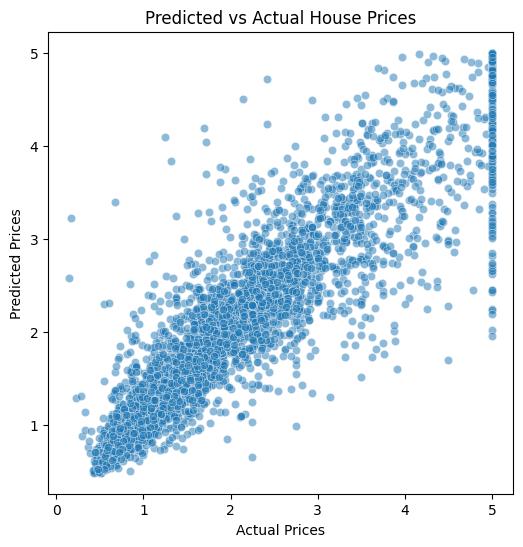

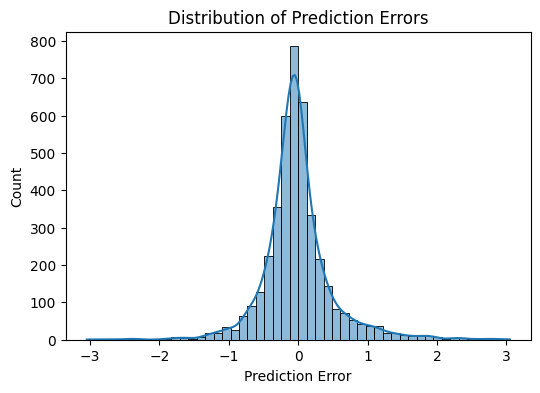

AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'

In [15]:
#prediction and evaluation
# for the MSE it measures the average squared difference between actual values and predictions.
#varience = Variance measures how spread out the data is around the mean.( The total variance of y is How much do house values differ from the average house value across California?”)
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)


# for dispaly of visuals ( graphs and charts )
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Predicted vs Actual
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices")
plt.show()

# 2. Residuals (Errors)
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Prediction Error")
plt.title("Distribution of Prediction Errors")
plt.show()

# 3. Feature Importance (Linear Regression Coefficients)
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients.sort_values().plot(kind="barh", figsize=(8,6))
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


#explanation of visuals generated
# ===================================
# 🔍 Automated Explanation Section
# ===================================

# 1. Explanation for Predicted vs Actual
print("\n--- Predicted vs Actual ---")
print("This scatter plot compares actual house prices (x-axis) vs predicted prices (y-axis).")
print("→ If points lie close to the diagonal line, the model is predicting well.")
print("→ A wide spread indicates the model has some error in predictions.")

# 2. Explanation for Residuals
print("\n--- Residuals (Errors) ---")
print("This shows the distribution of prediction errors (actual - predicted).")
print("→ If errors are centered around 0, the model is unbiased.")
print("→ If the distribution is skewed, the model may systematically over- or under-predict.")

# 3. Explanation for Feature Importance
print("\n--- Feature Importance ---")
print("The bar chart shows how each feature impacts house price (from linear regression coefficients).")
print("→ A positive value means higher values of the feature increase price.")
print("→ A negative value means higher values of the feature decrease price.")
print("→ For example, 'MedInc' (median income) usually has the strongest positive effect on house prices.")

# 4. Explanation for Correlation Heatmap
print("\n--- Correlation Heatmap ---")
print("This heatmap shows relationships between features.")
print("→ Values close to +1 = strong positive correlation (move together).")
print("→ Values close to -1 = strong negative correlation (move in opposite directions).")
print("→ For example, 'AveRooms' and 'AveBedrms' are highly correlated (0.85).")
print("→ Latitude and Longitude are strongly negatively correlated (-0.92).")

